In [2]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
from experiment import *
import logging
import pandas
from pandas import DataFrame as df
from scipy.interpolate import make_interp_spline, BSpline
from scipy.ndimage import uniform_filter1d

In [3]:
!pwd

/home/156/jm0124/kae-cyclones/src


In [4]:
def smooth(x,y, N=5):
    return x, uniform_filter1d(y, size=N) 

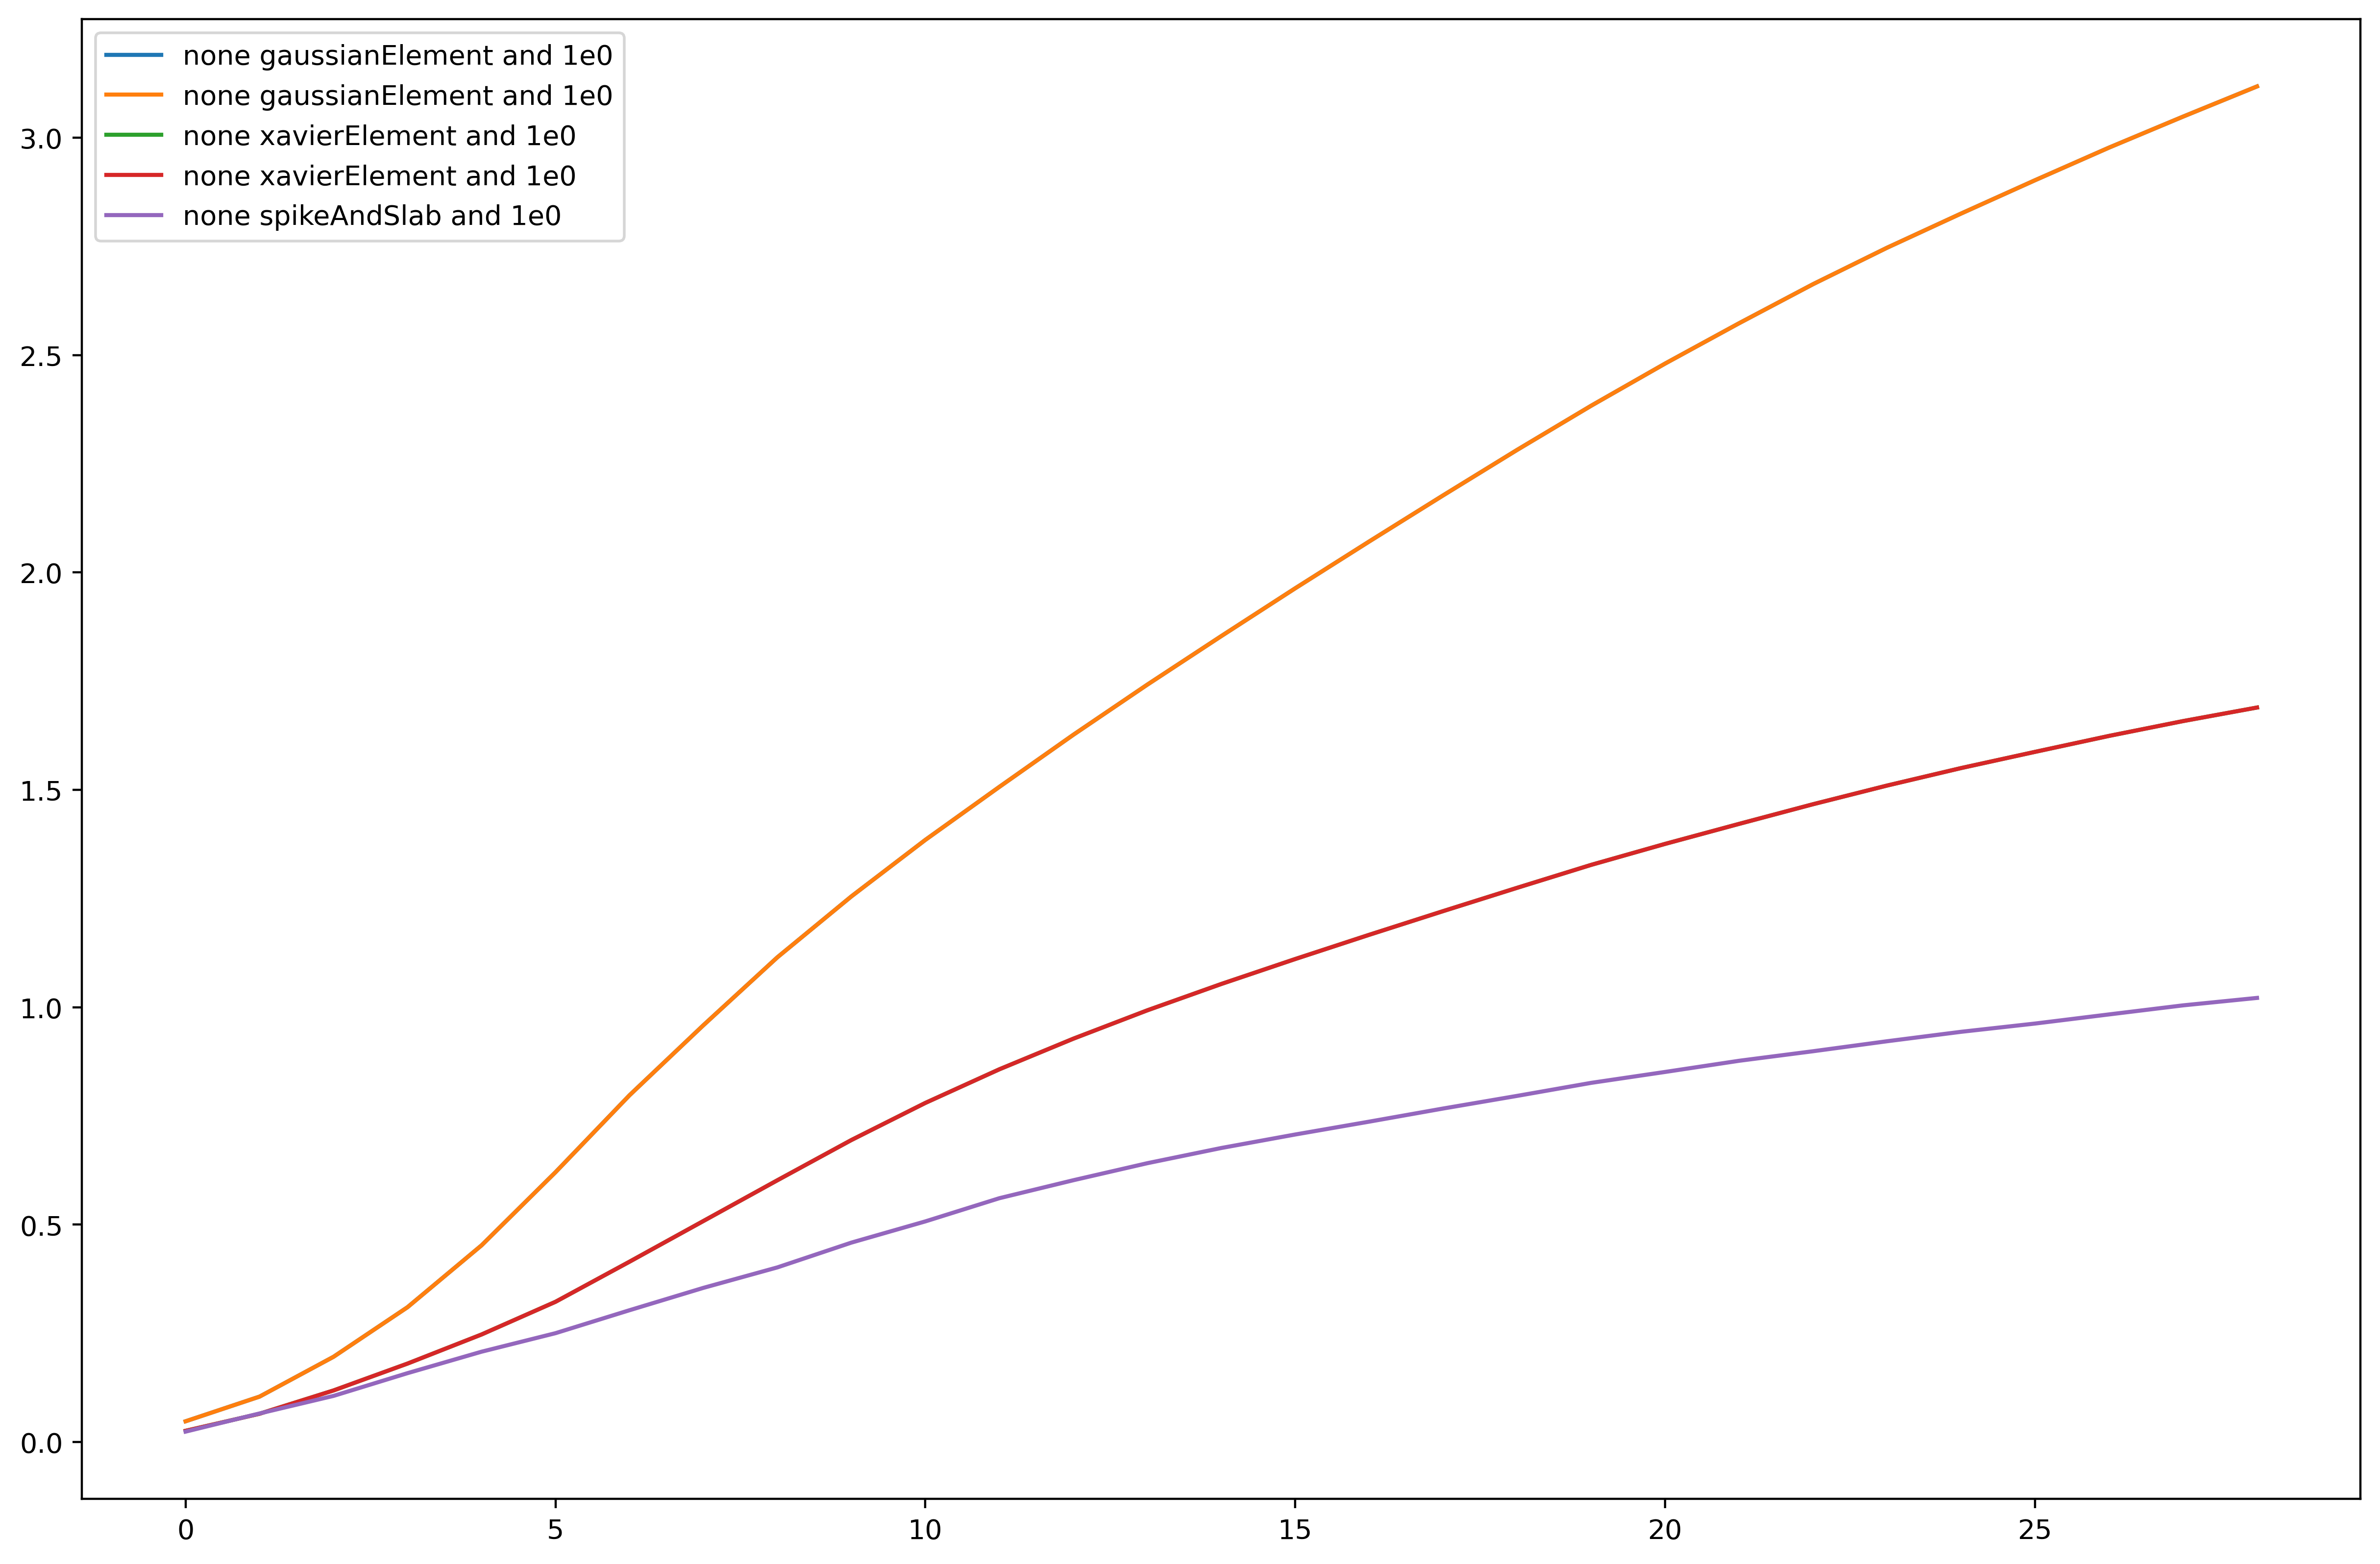

In [5]:
with open("/home/156/jm0124/kae-cyclones/results/final_jsons/ocean_final.json", 'r') as f:
     results = json.load(f)

# with open("/home/156/jm0124/kae-cyclones/results/run_data/xavierOcean2.json", 'r') as f:
#     results2 = json.load(f)
#     results['none'].update(results2['none'])
        
# with open("/home/156/jm0124/kae-cyclones/results/run_data/trying_new_ocean.json", 'r') as f:
#      results2 = json.load(f)

# print(results)

fig = plt.figure(1,figsize=(15,10), dpi=400)

for category, cat_data in results.items():
    #plt.yscale('log')
    for init, data in cat_data.items():
        for i, (name,data2) in enumerate(data.items()):
            if category == 'none':
                plt.plot(np.cumsum(np.array(list(data.items())[i][1]['testAccuracy'])), label=f"{category} {init} and {name}")
            if category == 'none' and (init == 'gaussianElement' or init == 'xavierElement'):
                plt.plot(np.cumsum(np.array(list(data.items())[i][1]['testAccuracy'])), label=f"{category} {init} and {name}")
            #plt.plot(np.array(list(data.items())[i][1]['time']),np.array(list(data.items())[i][1]['fwd_val']), label=f"{category} {init} and {name}")

# print(results['none']['spikeAndSlab']['1e-1'].keys())
# r = np.cumsum(results['none']['newInit']['1e0']['testAccuracy'])
# x,y = smooth(r,[i for i in range(0,len(r))])
# print(x)
# plt.plot(y,x, color='blue')

# r = np.cumsum(results2['none']['unitPerturb']['1e0']['testAccuracy'])
# x,y = smooth(r,[i for i in range(0,len(r))])
# plt.plot(y,x)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

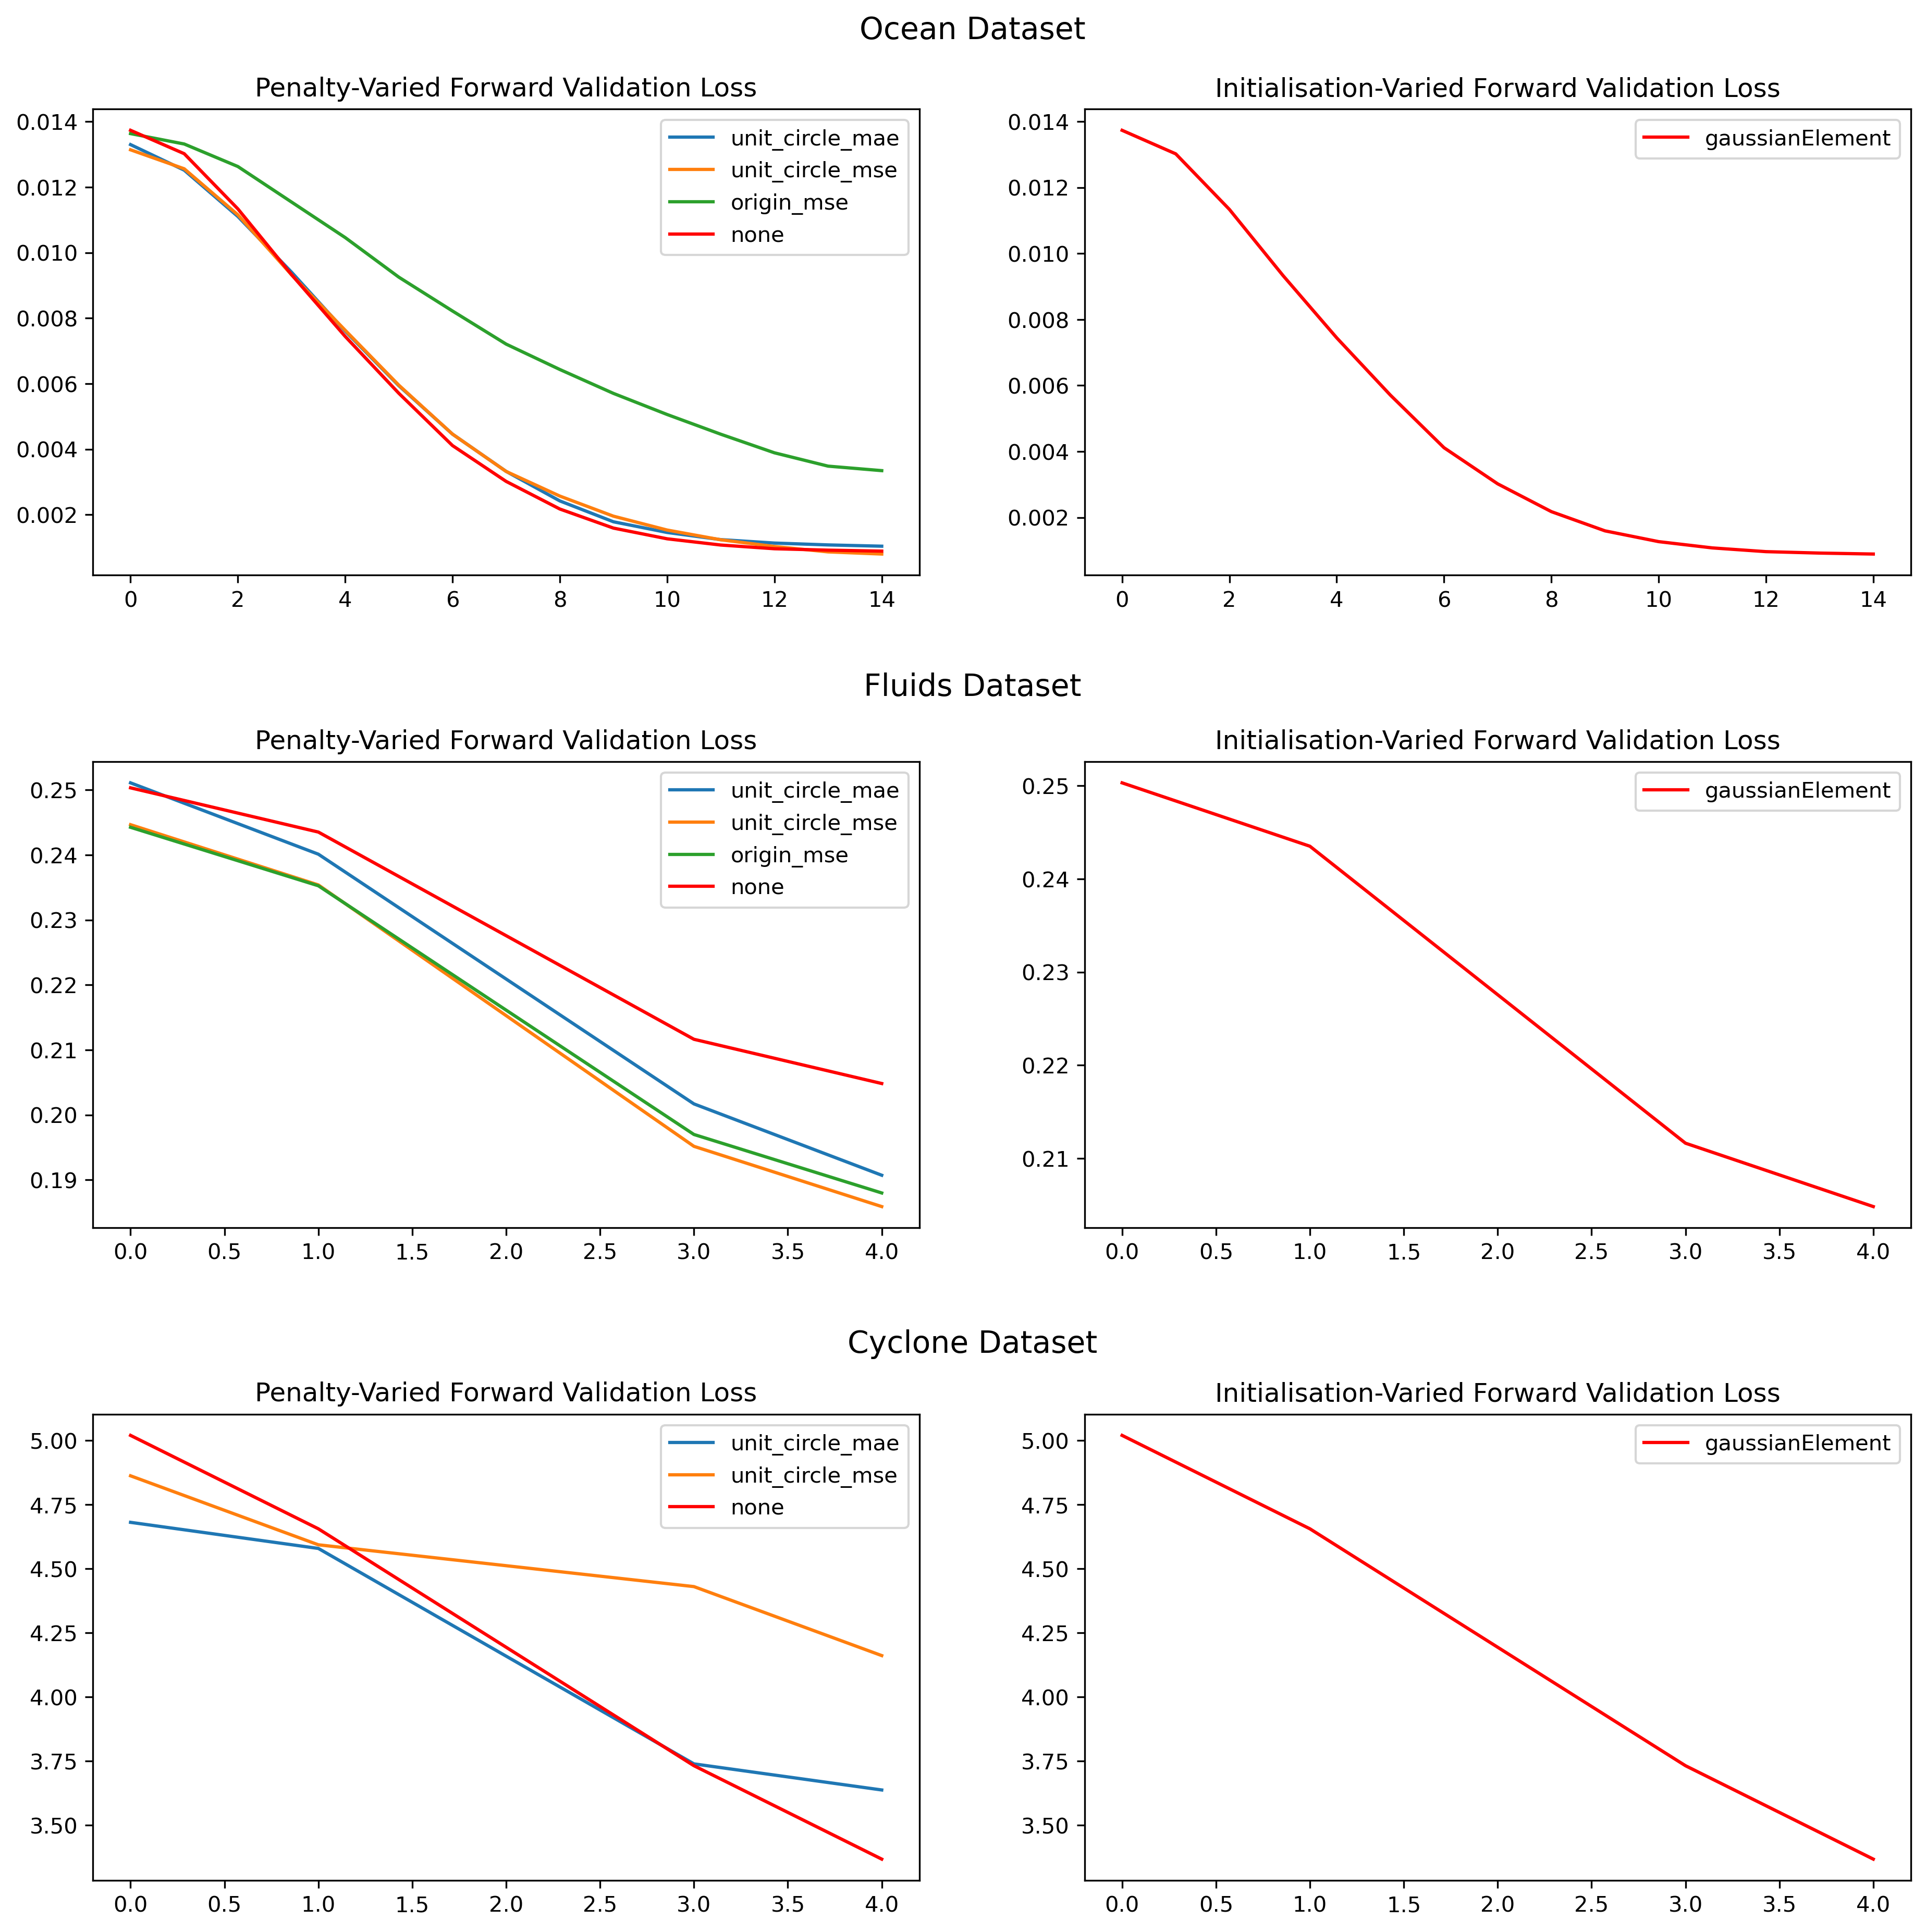

In [5]:
logger = logging.getLogger('my_module_name')
otherResults = []

with open("/home/156/jm0124/kae-cyclones/results/run_data/ocean_overnight_testing.json", 'r') as f:
     otherResults.append(('Fluid',json.load(f)))
        
with open("/home/156/jm0124/kae-cyclones/results/run_data/fluid_overnight_testing.json", 'r') as f:
    otherResults.append(('Fluids', json.load(f)))
    
with open("/home/156/jm0124/kae-cyclones/results/run_data/cyclone_overnight_testing_2.json", 'r') as f:
    otherResults.append(('Cyclone', json.load(f)))
    
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=300)

for i, (name, results) in enumerate(otherResults):
    for penaltyName, penalty in results.items():
        epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["loss"]))]
        if penaltyName == 'none':
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}", color='r')
        else:
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}")

        if penaltyName == 'none':
            for init_name, init in penalty.items():
                if (init_name == 'doubleGaussianEigen' or init_name == 'svdElement'):
                    continue
                elif init_name == 'gaussianElement':
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}", color='r')
                else:
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}")

        axs[i][0].legend()
        axs[i][1].legend()
        axs[i][0].set_title('Penalty-Varied Forward Validation Loss')
        axs[i][1].set_title('Initialisation-Varied Forward Validation Loss')

# for row in axs:
#     for ax in row:
#         ax.set_yscale('log')
#         ax.set_xscale('log')

plt.figtext(0.5,0.92, "Ocean Dataset", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.64, "Fluids Dataset", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.36, "Cyclone Dataset", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
plt.savefig('final_otherds.png')
plt.show()

dict_keys(['unit_circle_mae', 'unit_circle_mse', 'none'])
dict_keys(['unit_circle_mae', 'unit_circle_mse', 'none'])
dict_keys(['unit_circle_mae', 'unit_circle_mse', 'none'])
Diss0
Diss0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Diss0
Diss0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Diss0
Diss0 [0, 1, 2

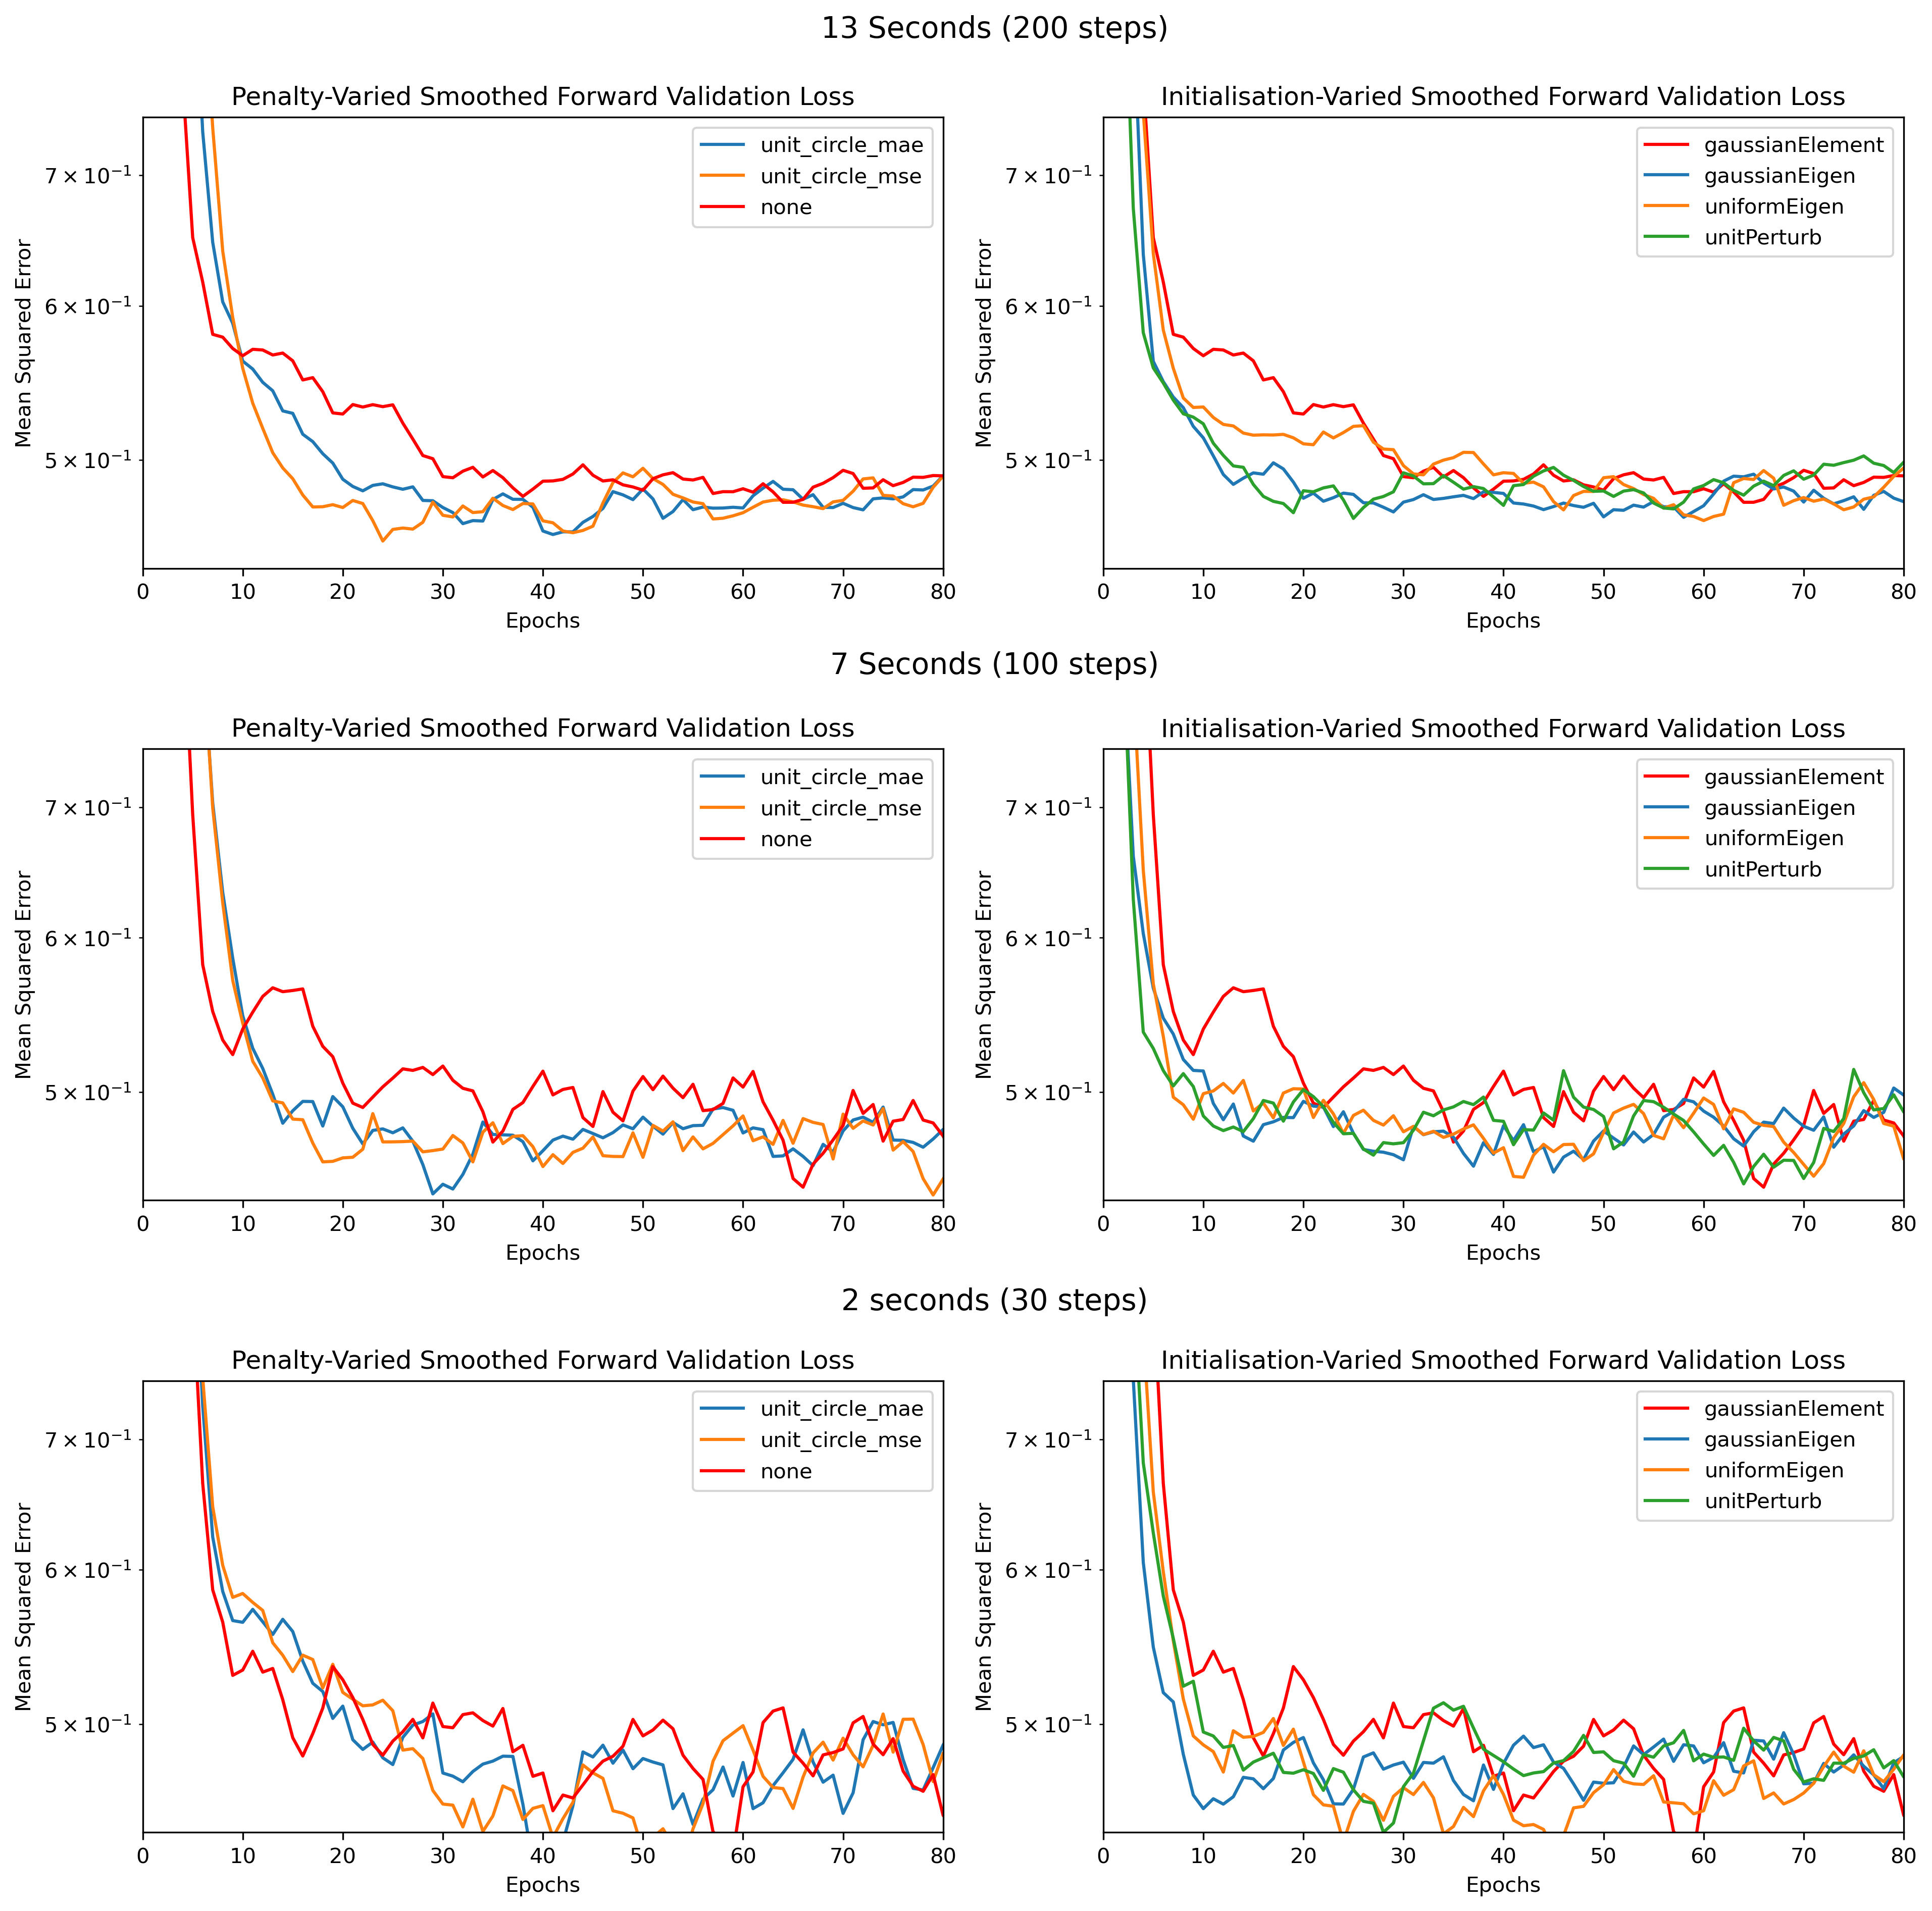

In [6]:
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=300)
otherResults = []

with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum0_overnight_penal_noise_run_200_a.json", 'r') as f:
     otherResults.append(('Diss0', json.load(f)))
        
with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum0_overnight_penal_noise_run_200.json", 'r') as f:
    otherResults[0][1]["none"].update(json.load(f)["none"])
    print(otherResults[0][1].keys())

with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum0_overnight_penal_noise_run_100_a.json", 'r') as f:
    otherResults.append(('Diss5', json.load(f)))

with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum0_overnight_penal_noise_run_100.json", 'r') as f:
    otherResults[1][1]["none"].update(json.load(f)["none"])
    print(otherResults[1][1].keys())
    
with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum0_overnight_penal_noise_run_30_a.json", 'r') as f:
    otherResults.append(('Diss9', json.load(f)))

with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum0_overnight_penal_noise_run_30.json", 'r') as f:
    otherResults[2][1]["none"].update(json.load(f)["none"])
    print(otherResults[2][1].keys())

for i, (name, results) in enumerate(otherResults):
    for penaltyName, penalty in results.items():
        print(name)
        epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["loss"]))]
        print(name, epochs)
        if penaltyName == 'none':
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            print(X_)
            print(Y_)
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}", color='r')
        elif penaltyName == 'origin_mse':
            continue
        else:
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}")
        
        if penaltyName == 'none':
            for init_name, init in penalty.items():
                epochs = [x for x in range(len(penalty["gaussianEigen"]["1e0"]["loss"]))]
                if (init_name == 'doubleGaussianEigen' or init_name == 'svdElement'):
                    continue
                elif init_name == 'gaussianElement':
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"][:len(epochs)])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}", color='r')
                    continue
                else:
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}")

for l in axs:
    for ax in l:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Mean Squared Error')
        ax.set_yscale('log')
        # ax.set_xscale('log')
        # ax.set_xlim(0,100)
        ax.set_ylim(0.44,0.75)
        ax.set_xlim(0,80)
        ax.legend(loc=1)

    l[0].set_title('Penalty-Varied Smoothed Forward Validation Loss')
    l[1].set_title('Initialisation-Varied Smoothed Forward Validation Loss')
    
plt.figtext(0.5,0.925, "13 Seconds (200 steps)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.645, "7 Seconds (100 steps)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.365, "2 seconds (30 steps)", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
plt.savefig('final_pend.pdf', transparent=True, bbox_inches='tight',pad_inches=0, dpi=300)

In [7]:
fig = plt.figure(1,figsize=(10,5), dpi=200)

with open("/home/156/jm0124/kae-cyclones/results/run_data/ocean_both.json", 'r') as f:
     results = json.load(f)

mins = {}        

for penaltyName, penalty in results.items():
    epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["loss"]))]
    for init_name, init in penalty.items():
        X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"][:len(epochs)])
        plt.plot(X_, Y_, label=f"{penaltyName}-{init_name}")
        mins[penaltyName][init_name] = np.array(
        #     continue
        # else:
        #     X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
        #     plt.plot(X_, Y_, label=f"{init_name}")

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
# plt.xscale('log')
# ax.set_xlim(0,100)
plt.ylim(0,1e-3)
plt.xlim(0,100)
plt.legend(loc=1)
    
# plt.figtext(0.5,0.925, "13 Seconds (200 steps)", ha="center", va="top", fontsize=14)
# plt.figtext(0.5,0.645, "7 Seconds (100 steps)", ha="center", va="top", fontsize=14)
# plt.figtext(0.5,0.365, "2 seconds (30 steps)", ha="center", va="top", fontsize=14)
# plt.subplots_adjust(hspace = 0.4 )
plt.savefig('four_comparison.png')
plt.show()

SyntaxError: invalid syntax (2256260339.py, line 20)

In [ ]:
allResults = []

with open("/home/156/jm0124/kae-cyclones/results/run_data/ocean_both.json", 'r') as f:
     allResults.append(('ocean',json.load(f)))

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluid_both_updated.json", 'r') as f:
     allResults.append(('fluid',json.load(f)))
        
with open("/home/156/jm0124/kae-cyclones/results/run_data/cyclone_both_updated.json", 'r') as f:
     allResults.append(('cyclone',json.load(f)))

mins = {}    
noneNone = []
noneUnit = []
mseNone = []
mseUnit = []

for (name, ds) in allResults:
    noneNone.append(np.array([np.argmin(ds['none']['gaussianElement']['1e0']['fwd_val']), np.min(ds['none']['gaussianElement']['1e0']['fwd_val'])]))
    noneUnit.append(np.array([np.argmin(ds['none']['unitPerturb']['1e0']['fwd_val']), np.min(ds['none']['unitPerturb']['1e0']['fwd_val'])]))
    mseNone.append(np.array([np.argmin(ds['unit_circle_mse']['gaussianElement']['1e0']['fwd_val']), np.min(ds['unit_circle_mse']['gaussianElement']['1e0']['fwd_val'])]))
    mseUnit.append(np.array([np.argmin(ds['unit_circle_mse']['unitPerturb']['1e0']['fwd_val']), np.min(ds['unit_circle_mse']['unitPerturb']['1e0']['fwd_val'])]))
#     for penaltyName, penalty in results.items():
        
#         mins[name][penaltyName] = {}
#         epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["loss"]))]
#         for initName, init in penalty.items():
#             X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"][:len(epochs)])
#             mins[name][penaltyName][initName] = [np.argmin(init["1e0"]["fwd_val"][:len(epochs)]), np.min(init["1e0"]["fwd_val"][:len(epochs)])]
            

# colors = {
#     'ocean':'royalblue',
#     'fluid':'r',
#     'cyclone':'g'
# }

# ax = fig.add_axes([0,0,1,1])
# X = np.arange(4)

# for i, (dsName, ds) in enumerate(mins.items()):
#     for j, (penaltyName, penalty) in enumerate(ds.items()):
#         for k, (initName, init) in enumerate(penalty.items()):
#             ax.bar(f"{init[0]}", init[1], color=colors[dsName], tick-label='yes')

fig = plt.figure(figsize=(15,8), dpi=500)

noneNone = np.array(noneNone)
noneUnit = np.array(noneUnit)
mseNone = np.array(mseNone)
mseUnit = np.array(mseUnit)

noneNone[2,1] = noneNone[2,1] * 2e-4
noneUnit[2,1] = noneUnit[2,1] * 2e-4
mseNone[2,1] = mseNone[2,1] * 2e-4
mseUnit[2,1] = mseUnit[2,1] * 2e-4

noneNone[1,1] = noneNone[1,1] * 1e-2
noneUnit[1,1] = noneUnit[1,1] * 1e-2
mseNone[1,1] = mseNone[1,1] * 1e-2
mseUnit[1,1] = mseUnit[1,1] * 1e-2

barWidth = 0.2
 
# set height of bar
IT = noneNone[:,0]
ECE = noneUnit[:,0]
CSE = mseNone[:,0]
 
# Set position of bar on X axis
br1 = np.arange(len(noneNone[:,0]))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
p1 = plt.bar(br1, noneNone[:,1], width = barWidth,
        edgecolor ='grey', label ='none-gaussianElement')
p2 = plt.bar(br2, noneUnit[:,1], width = barWidth,
        edgecolor ='grey', label ='none-unitPerturb')
p3 = plt.bar(br3, mseNone[:,1], width = barWidth,
        edgecolor ='grey', label ='unit_circle_mse-gaussianElement')
p4 = plt.bar(br4, mseUnit[:,1], width = barWidth,
        edgecolor ='grey', label ='unit_circle_mse-unitPerturb')
 
# Adding Xticks
plt.xlabel('Dataset')
plt.ylabel('MSE')
plt.xticks([r + barWidth+0.1 for r in range(3)],
        ['ocean', 'fluid ($1 \cdot 10^{-2}$)', 'cyclone ($2 \cdot 10^{-4}$)'])
 
plt.bar_label(p1, noneNone[:,0].astype(int))
plt.bar_label(p2, noneUnit[:,0].astype(int))
plt.bar_label(p3, mseNone[:,0].astype(int))
plt.bar_label(p4, mseUnit[:,0].astype(int))
# plt.yscale('log')
plt.legend()
plt.savefig('comparison_with.pdf', transparent=True, bbox_inches='tight',pad_inches=0, dpi=300)
plt.show()


In [ ]:
fig = plt.figure(1,figsize=(10,5), dpi=200)

with open("/home/156/jm0124/kae-cyclones/results/run_data/trying_new_100.json", 'r') as f:
     results = json.load(f)

print(results['none']['gaussianElement']['1e0'].keys())
        
mins = {}        

for penaltyName, penalty in results.items():
    epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["testAccuracy"]))]
    for init_name, init in penalty.items():
        if init_name == 'uniformEigen' or penaltyName == 'origin_mse':
             continue
        #print(init["1e0"]["testAccuracy"])
        X_, Y_ =  smooth(epochs, np.cumsum(init["1e0"]["testAccuracy"]))
        std_values = np.cumsum(init["1e0"]["testStd"])
        val_x, val_y = (smooth(list(range(0,len(init["1e0"]["fwd_val"]))), init["1e0"]["fwd_val"]))
        #plt.plot(val_x, val_y, label=f"{penaltyName}-{init_name}")
        plt.plot(X_, Y_, label=f"{penaltyName}-{init_name}")
        plt.fill_between(X_, Y_-np.array(std_values)/30, Y_+np.array(std_values)/30, alpha=0.5)
        print(len(penalty["gaussianElement"]["1e0"]["eigen"]))

plt.xlabel('Time Steps')
plt.ylabel('Mean Squared Error')
#plt.yscale('log')
# plt.xscale('log')
# ax.set_xlim(0,100)
# plt.ylim(0,1)
# plt.xlim(0,100)
plt.legend(loc=4)

    
plt.savefig('new.png')
plt.show()

### name: pendulum none gaussianElement ###
Convergence: 15
### name: pendulum none xavierElement ###
Convergence: 16
### name: pendulum none uniformEigen ###
Convergence: 13
### name: pendulum none-consistent gaussianElement ###
Convergence: 22
### name: pendulum none-consistent uniformEigen ###
Convergence: 11
### name: pendulum none-consistent spikeAndSlab ###
Convergence: 21
### name: pendulum unit_circle_mse-none gaussianElement ###
Convergence: 15
### name: pendulum unit_circle_mse-none uniformEigen ###
Convergence: 9
### name: pendulum unit_circle_mse-none spikeAndSlab ###
Convergence: 11
### name: pendulum unit_circle_mse-consistent uniformEigen ###
Convergence: 13
### name: pendulum unit_circle_mse-consistent spikeAndSlab ###
Convergence: 15
### name: fluid none gaussianElement ###
Convergence: 42
### name: fluid none xavierElement ###
Convergence: 17
### name: fluid none uniformEigen ###
Convergence: 10
### name: fluid none spikeAndSlab ###
Convergence: 9
### name: fluid none

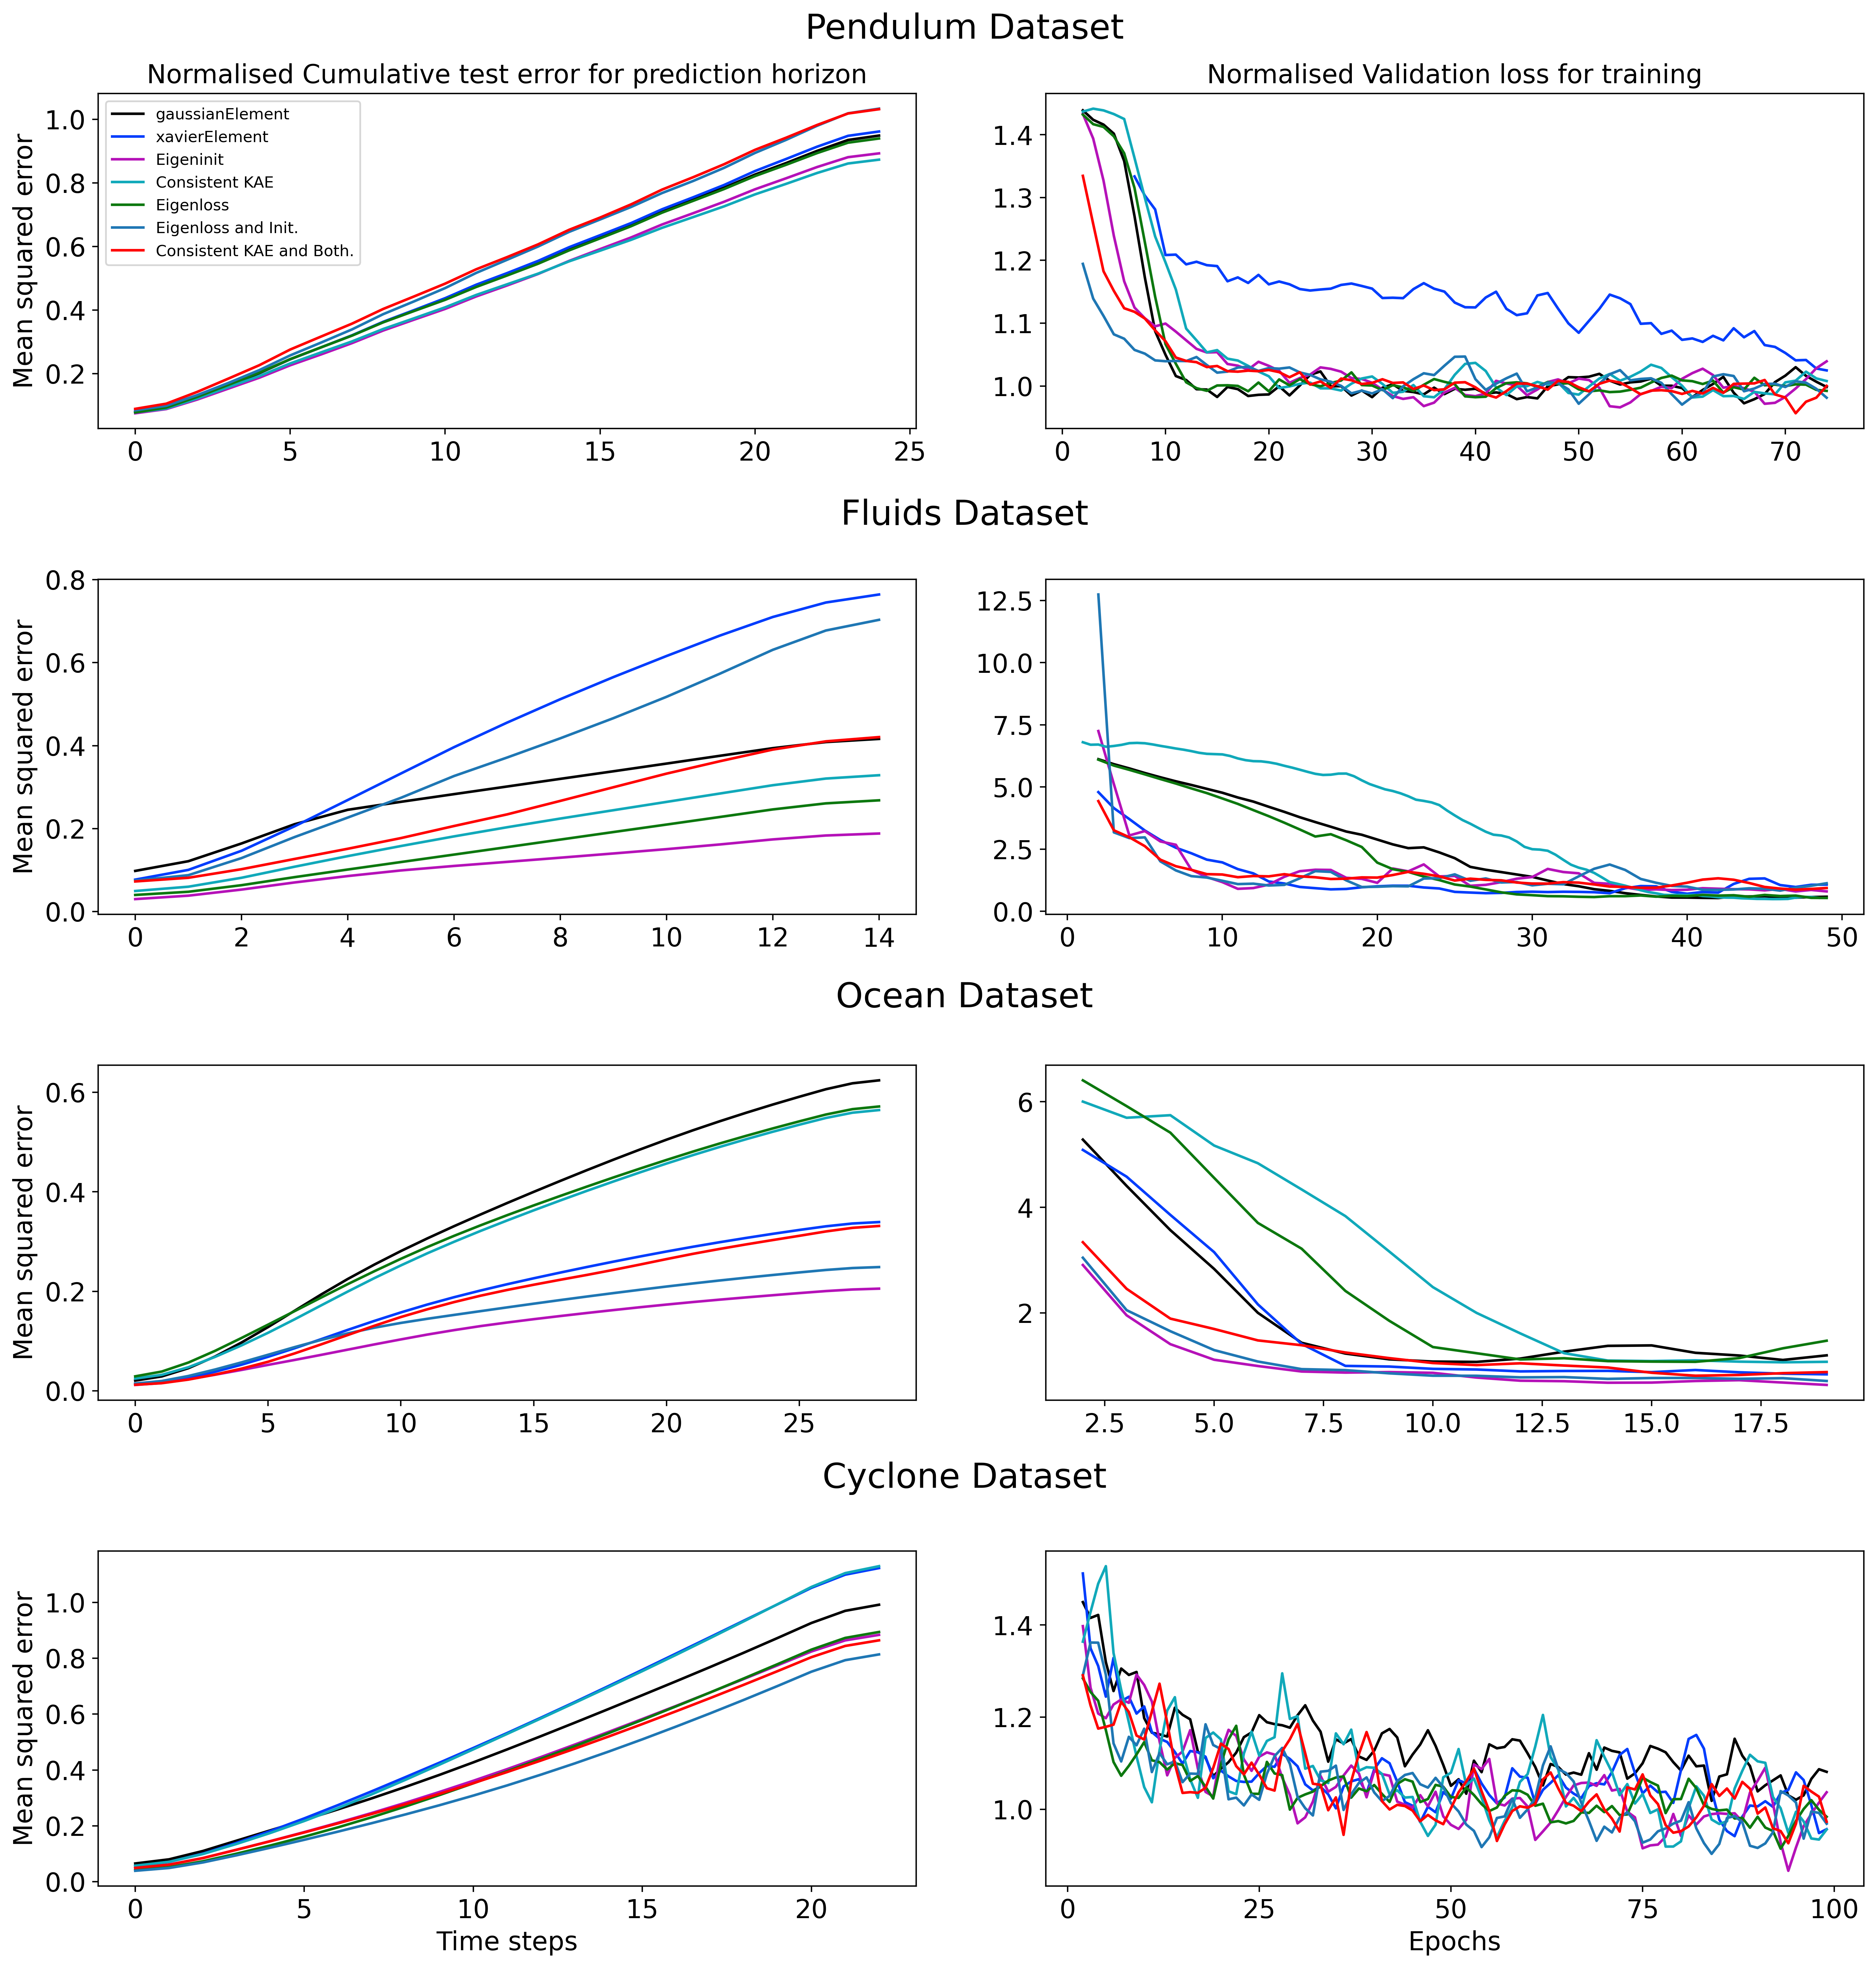

'\nocean & none & gaussianElement & 0.028 & 3.163\nocean & none & unitPerturb & 0.021 & 1.508\nocean & unit_circle_mse & gaussianElement & 0.029 & 2.804\nocean & unit_circle_mse & unitPerturb & 0.018 & 1.233\n'

In [60]:
import seaborn as sns
fig, axs = plt.subplots(4,2,figsize=(15,15), dpi=400)
plt.tight_layout(w_pad=4)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

results = []

with open("/home/156/jm0124/kae-cyclones/results/final_jsons/pendulum_final.json", 'r') as f:
     results.append(('pendulum',json.load(f)))

with open("/home/156/jm0124/kae-cyclones/results/final_jsons/fluid_final.json", 'r') as f:
     results.append(('fluid',json.load(f)))

with open("/home/156/jm0124/kae-cyclones/results/final_jsons/ocean_final.json", 'r') as f:
     results.append(('ocean',json.load(f)))

with open("/home/156/jm0124/kae-cyclones/results/final_jsons/cyclone_final.json", 'r') as f:
     results.append(('cyclone',json.load(f)))
        
# with open("/home/156/jm0124/kae-cyclones/results/run_data/consInitPend.json", 'r') as f:
#      results[0][1].update(json.load(f))

# with open("/home/156/jm0124/kae-cyclones/results/run_data/trying_new_fluid_7.json", 'r') as f:
#      results.append(('fluid',json.load(f)))

# with open("/home/156/jm0124/kae-cyclones/results/run_data/trying_new_fluid_C.json", 'r') as f:
#      results[1][1]['none-consistent'] = json.load(f)['none-consistent']

# with open("/home/156/jm0124/kae-cyclones/results/run_data/consInitFluid.json", 'r') as f:
#      results[1][1]['none-consistent'].update(json.load(f)['none-consistent'])

# with open("/home/156/jm0124/kae-cyclones/results/run_data/trying_new_ocean.json", 'r') as f:
#      results.append(('ocean',json.load(f)))

# with open("/home/156/jm0124/kae-cyclones/results/run_data/allInitOcean.json", 'r') as f:
#     d = json.load(f)
#     print(d)
#     results[2][1]['none-consistent'] = d['none-consistent']
#     results[2][1]['none']['unitPerturb'] = d['none']['newInit']
#     results[2][1]['unit_circle_mse']['unitPerturb'] = d['unit_circle_mse']['newInit']
    
# with open("/home/156/jm0124/kae-cyclones/results/run_data/twoOthersOcean.json", 'r') as f:
#      results[2][1]['none-consistent'] = json.load(f)['none-consistent']
    
# with open("/home/156/jm0124/kae-cyclones/results/run_data/consInitOcean.json", 'r') as f:
#      results[2][1]['none-consistent'].update(json.load(f)['none-consistent'])

# with open("/home/156/jm0124/kae-cyclones/results/run_data/trying_new_cyclone_6.json", 'r') as f:
#      results.append(('cyclone',json.load(f)))
        
# with open("/home/156/jm0124/kae-cyclones/results/run_data/approxEperimentCyclones.json", 'r') as f:
#      results[3][1].update(json.load(f))

# print(results[3][1].keys())

# print(len(results))
#print(results['none']['gaussianElement']['1e0'].keys())
        
colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired

colors = ['black', '#003DFD', '#b512b8', '#11a9ba', '#0d780f', '#f77f07', 'red']

mins = {}        
plt.locator_params(axis='x', nbins=5)
ocean_tests, fluid_tests, cyclone_tests, pend_tests = [], [], [], []
ocean_vals, fluid_vals, cyclone_vals, pend_vals = [], [], [], []

for i, (name, result) in enumerate(results):
    plt.subplots_adjust(hspace = 0.4)
    z = 0
    for penaltyName, penalty in result.items():
        if name == 'ocean':
            epochs = list(range(0,20))
        elif name == 'fluid':
            epochs = range(0,50)
        for init_name, init in penalty.items():
            smoothing = 3
            testList = list(init.values())[0]["testAccuracy"]
            valList = list(init.values())[0]["fwd_val"]
        
            print(f"### name: {name} {penaltyName} {init_name} ###")
            # print(f"Test score: {penaltyName} {init_name} {np.cumsum(np.array(testList))[-1]}")
            # print(f"Validation score: {penaltyName} {init_name} {np.min((np.array(valList)))}")
            maxdiff = np.diff(np.array(valList))
            sx, sy = smooth(list(range(0,len(maxdiff))), maxdiff, N=10)
            max_sy = np.max(sy)
            print(f"Convergence: {np.argmax(np.abs(sy)[5:] < max_sy/2) + 5}")
            # print((np.abs(sy)[5:] < max_sy/4))
            
            if name == 'ocean': 
                ocean_tests.append(np.cumsum(testList)[-1])
                ocean_vals.append(valList[-1])
                testList = np.array(testList)/4.905398384724754
                valList = np.array(valList)/0.026554503954074715
            if name == 'pendulum': 
                pend_tests.append(np.cumsum(testList)[-1])
                pend_vals.append(valList[-1])
                testList = np.array(testList)/179.12446653607196
                valList = np.array(valList)/11.571667144269846
            if name == 'fluid': 
                fluid_tests.append(np.cumsum(testList)[-1])
                fluid_vals.append(valList[-1])
                testList = np.array(testList)/2.9003328191484608
                valList = np.array(valList)/0.3749913381375478
            if name == 'cyclone': 
                cyclone_tests.append(np.cumsum(testList)[-1])
                cyclone_vals.append(valList[-1])
                testList = np.array(testList)/535.3547473734762
                valList = np.array(valList)/16.953404107527298
            X_, Y_ =  smooth(list(range(0,len(testList))), np.cumsum(np.array(testList)))
            val_x, val_y = (smooth(list(range(0,len(valList))), valList, smoothing))
            val_x = val_x[2:]
            val_y = val_y[2:]
            if name == 'ocean':
                val_x = val_x[:18]
                val_y = val_y[:18]
            if name == 'pendulum' and init_name == 'xavierElement':
                val_x = val_x[5:]
                val_y = val_y[5:]
            if penaltyName == 'none':
                if name == 'ocean' and init_name == 'spikeAndSlab':
                    init_name = 'Eigeninit'
                if name == 'fluid' and init_name == 'uniformEigen':
                    init_name = 'Eigeninit'
                if name == 'fluid' and init_name == 'spikeAndSlab':
                    continue
                if name == 'pendulum' and init_name == 'uniformEigen':
                    init_name = 'Eigeninit'
                if name == 'cyclone' and init_name == 'spikeAndSlab':
                    init_name = 'Eigeninit'
                # if name == 'pendulum' and init_name == 'spikeAndSlab':
                #     continue
                axs[i][1].plot(val_x, val_y, label=f"{init_name}", color = colors[z])
                axs[i][0].plot(X_, Y_, label=f"{init_name}", color = colors[z])
                z += 1
            if penaltyName == 'unit_circle_mse-none':
                if init_name == 'gaussianElement':
                    axs[i][1].plot(val_x, val_y, label=f"Eigenloss", color = colors[z])
                    axs[i][0].plot(X_, Y_, label=f"Eigenloss", color = colors[z])
                    z += 1
                if init_name == 'spikeAndSlab':
                    axs[i][1].plot(val_x, val_y, label=f"Eigenloss and Init.")
                    axs[i][0].plot(X_, Y_, label=f"Eigenloss and Init.")
                    z += 1
            if penaltyName == 'none-consistent':
                if init_name == 'gaussianElement' and name == 'fluid':
                    val_x = [x/2 for x in val_x]
                    val_x = val_x[:96]
                    val_y = val_y[:96]
                    axs[i][1].plot(val_x, val_y, label=f"Consistent KAE", color = colors[z])
                    axs[i][0].plot(X_, Y_, label=f"Consistent KAE", color = colors[z])
                    z += 1
                elif init_name == 'gaussianElement':
                    axs[i][1].plot(val_x, val_y, label=f"Consistent KAE", color = colors[z])
                    axs[i][0].plot(X_, Y_, label=f"Consistent KAE", color = colors[z])
                    z += 1
            if penaltyName == 'unit_circle_mse-consistent':
                if init_name == 'spikeAndSlab':
                    axs[i][1].plot(val_x, val_y, label=f"Consistent KAE and Both.", color = colors[z])
                    axs[i][0].plot(X_, Y_, label=f"Consistent KAE and Both.", color = colors[z])
                    z += 1
#             if name == 'ocean':
#                 if init_name == 'gaussianElement' and penaltyName == 'none-consistent':
#                     val_x, val_y = (smooth(np.linspace(0,50,110), init["1e0"]["fwd_val"], smoothing))
#                 else:
#                     val_x, val_y = (smooth(list(range(0,len(init["1e0"]["fwd_val"][:50]))), init["1e0"]["fwd_val"][:50], smoothing))
#             elif i == 3: 
#                 exclude = 'unitPerturb'
#                 smoothing = 20
#                 div = 15
#                 steps = 10
#                 X_, Y_ =  smooth(epochs[:steps], np.cumsum(init["1e0"]["testAccuracy"][:steps]))
#             elif i == 0: 
#                 exclude = 'uniformEigen'
#                 div = 15
            
#             if init_name == exclude or penaltyName == 'origin_mse':
#                 continue
#             #X_, Y_ =  smooth(epochs, np.cumsum(init["1e0"]["testAccuracy"]))
#             std_values = np.cumsum(init["1e0"]["testStd"])
#             print(f"{name} & {penaltyName} & {init_name} & {round(np.min(val_y), 3)} & {round(Y_[-1],3)} & {np.argmax(np.abs(np.diff(val_y)[15:]) < np.max(np.abs(np.diff(val_y)))/20) + 15}")
#             #axs[i][0].fill_between(X_, Y_-np.array(std_values)/div, Y_+np.array(std_values)/div, alpha=0.5)
            # axs[i][0].set_locator_params(axis='y', nbins=5)
            # axs[i][0].set_xticks(np.round(np.linspace(np.min(X_), np.max(X_), 5), 0))
            # axs[i][1].set_xticks(np.round(np.linspace(np.min(val_x), np.max(val_x), 5), 0))
            # axs[i][0].set_yticks(np.round(np.linspace(np.min(Y_), np.max(Y_), 6), 0))
            # axs[i][1].set_yticks(np.round(np.linspace(np.min(val_y), np.max(val_y),6), 0))
            #axs[i][0].set_yscale('log')
            #axs[i][1].set_yscale('log')
            # axs[i][0].legend(prop={'size': 7})
            # axs[i][1].legend(prop={'size': 7})

axs[0][0].set_ylabel('Mean squared error', fontsize=15)
axs[1][0].set_ylabel('Mean squared error', fontsize=15)
axs[2][0].set_ylabel('Mean squared error', fontsize=15)
axs[3][0].set_ylabel('Mean squared error', fontsize=15)
axs[3][0].set_xlabel('Time steps', fontsize=15)
axs[3][1].set_xlabel('Epochs', fontsize=15)
handles, labels = axs[3][0].get_legend_handles_labels()
print(labels)
handles, labels = axs[1][0].get_legend_handles_labels()
handles, labels = axs[2][0].get_legend_handles_labels()

# labels[0] = 'standard Koopman autoencoder'
# labels[1] = 'eigeninit without eigenloss'
# labels[2] = 'eigenloss without eigeninit'
# labels[3] = 'eigenloss and eigeninit'
# labels[4] = 'standard consistency Koopman autoencoder'
# labels[5] = 'best combination and consistency'
axs[0][0].legend(handles, labels, loc=0, prop={'size': 9})
axs[0][0].set_title('Normalised Cumulative test error for prediction horizon', fontsize=15)
axs[0][1].set_title('Normalised Validation loss for training', fontsize=15)
            
e = 1e-2   

# plt.xlabel('Time Steps')
# plt.ylabel('Mean Squared Error')
plt.figtext(0.5, 1.03, 'Pendulum Dataset', ha="center", va="top", fontsize=20)
plt.figtext(0.5,0.76+e, "Fluids Dataset", ha="center", va="top", fontsize=20)
plt.figtext(0.5,0.502+e, "Ocean Dataset", ha="center", va="top", fontsize=20)
plt.figtext(0.5,0.245+e, "Cyclone Dataset", ha="center", va="top", fontsize=20)
plt.subplots_adjust(hspace = 0.45 )

#plt.yscale('log')
# plt.xscale('log')
# ax.set_xlim(0,100)
# plt.ylim(0,1)
# plt.xlim(0,100)
#plt.legend(loc=4)

    
plt.savefig('new.pdf', transparent=True, bbox_inches='tight',pad_inches=0, dpi=300)
plt.show()

"""
ocean & none & gaussianElement & 0.028 & 3.163
ocean & none & unitPerturb & 0.021 & 1.508
ocean & unit_circle_mse & gaussianElement & 0.029 & 2.804
ocean & unit_circle_mse & unitPerturb & 0.018 & 1.233
"""

In [65]:
print(f"l2 average of ocean: {np.sum(np.array(ocean_tests))/len(ocean_tests)}")
print(f"l2 average of cyclone: {np.sum(np.array(cyclone_tests))/len(cyclone_tests)}")
print(f"l2 average of pend: {np.sum(np.array(pend_tests))/len(pend_tests)}")
print(f"l2 average of fluid: {np.sum(np.array(fluid_tests))/len(fluid_tests)}")

l2 average of ocean: 2.0800872866271267
l2 average of cyclone: 538.2602753086695
l2 average of pend: 179.9282258813965
l2 average of fluid: 1.4639674379275396


In [53]:
print(f"l2 average of ocean: {np.sum(np.array(ocean_vals))/len(ocean_vals)}")
print(f"l2 average of cyclone: {np.sum(np.array(cyclone_vals))/len(cyclone_vals)}")
print(f"l2 average of pend: {np.sum(np.array(pend_vals))/len(pend_vals)}")
print(f"l2 average of fluid: {np.sum(np.array(fluid_vals))/len(fluid_vals)}")

l2 average of ocean: 0.026554503954074715
l2 average of cyclone: 16.953404107527298
l2 average of pend: 11.571667144269846
l2 average of fluid: 0.3749913381375478


ocean g 3.3653512345626946
ocean g 3.419186787990232
ocean g 3.07188000716269
ocean g 3.012710833301147
ocean g 3.562708791655798
g = 1.0725535340607166
s = 0.9758277013897896
g = 0.8311733938753605
s = 1.035759512335062
g = 0.8460365198552608
s = 0.8127556294202805
g = 0.8311831392347813
s = 0.803810890763998
g = 1.0349006913602352
s = 0.8460121154785156
0.963087374945249
1.246141322577489


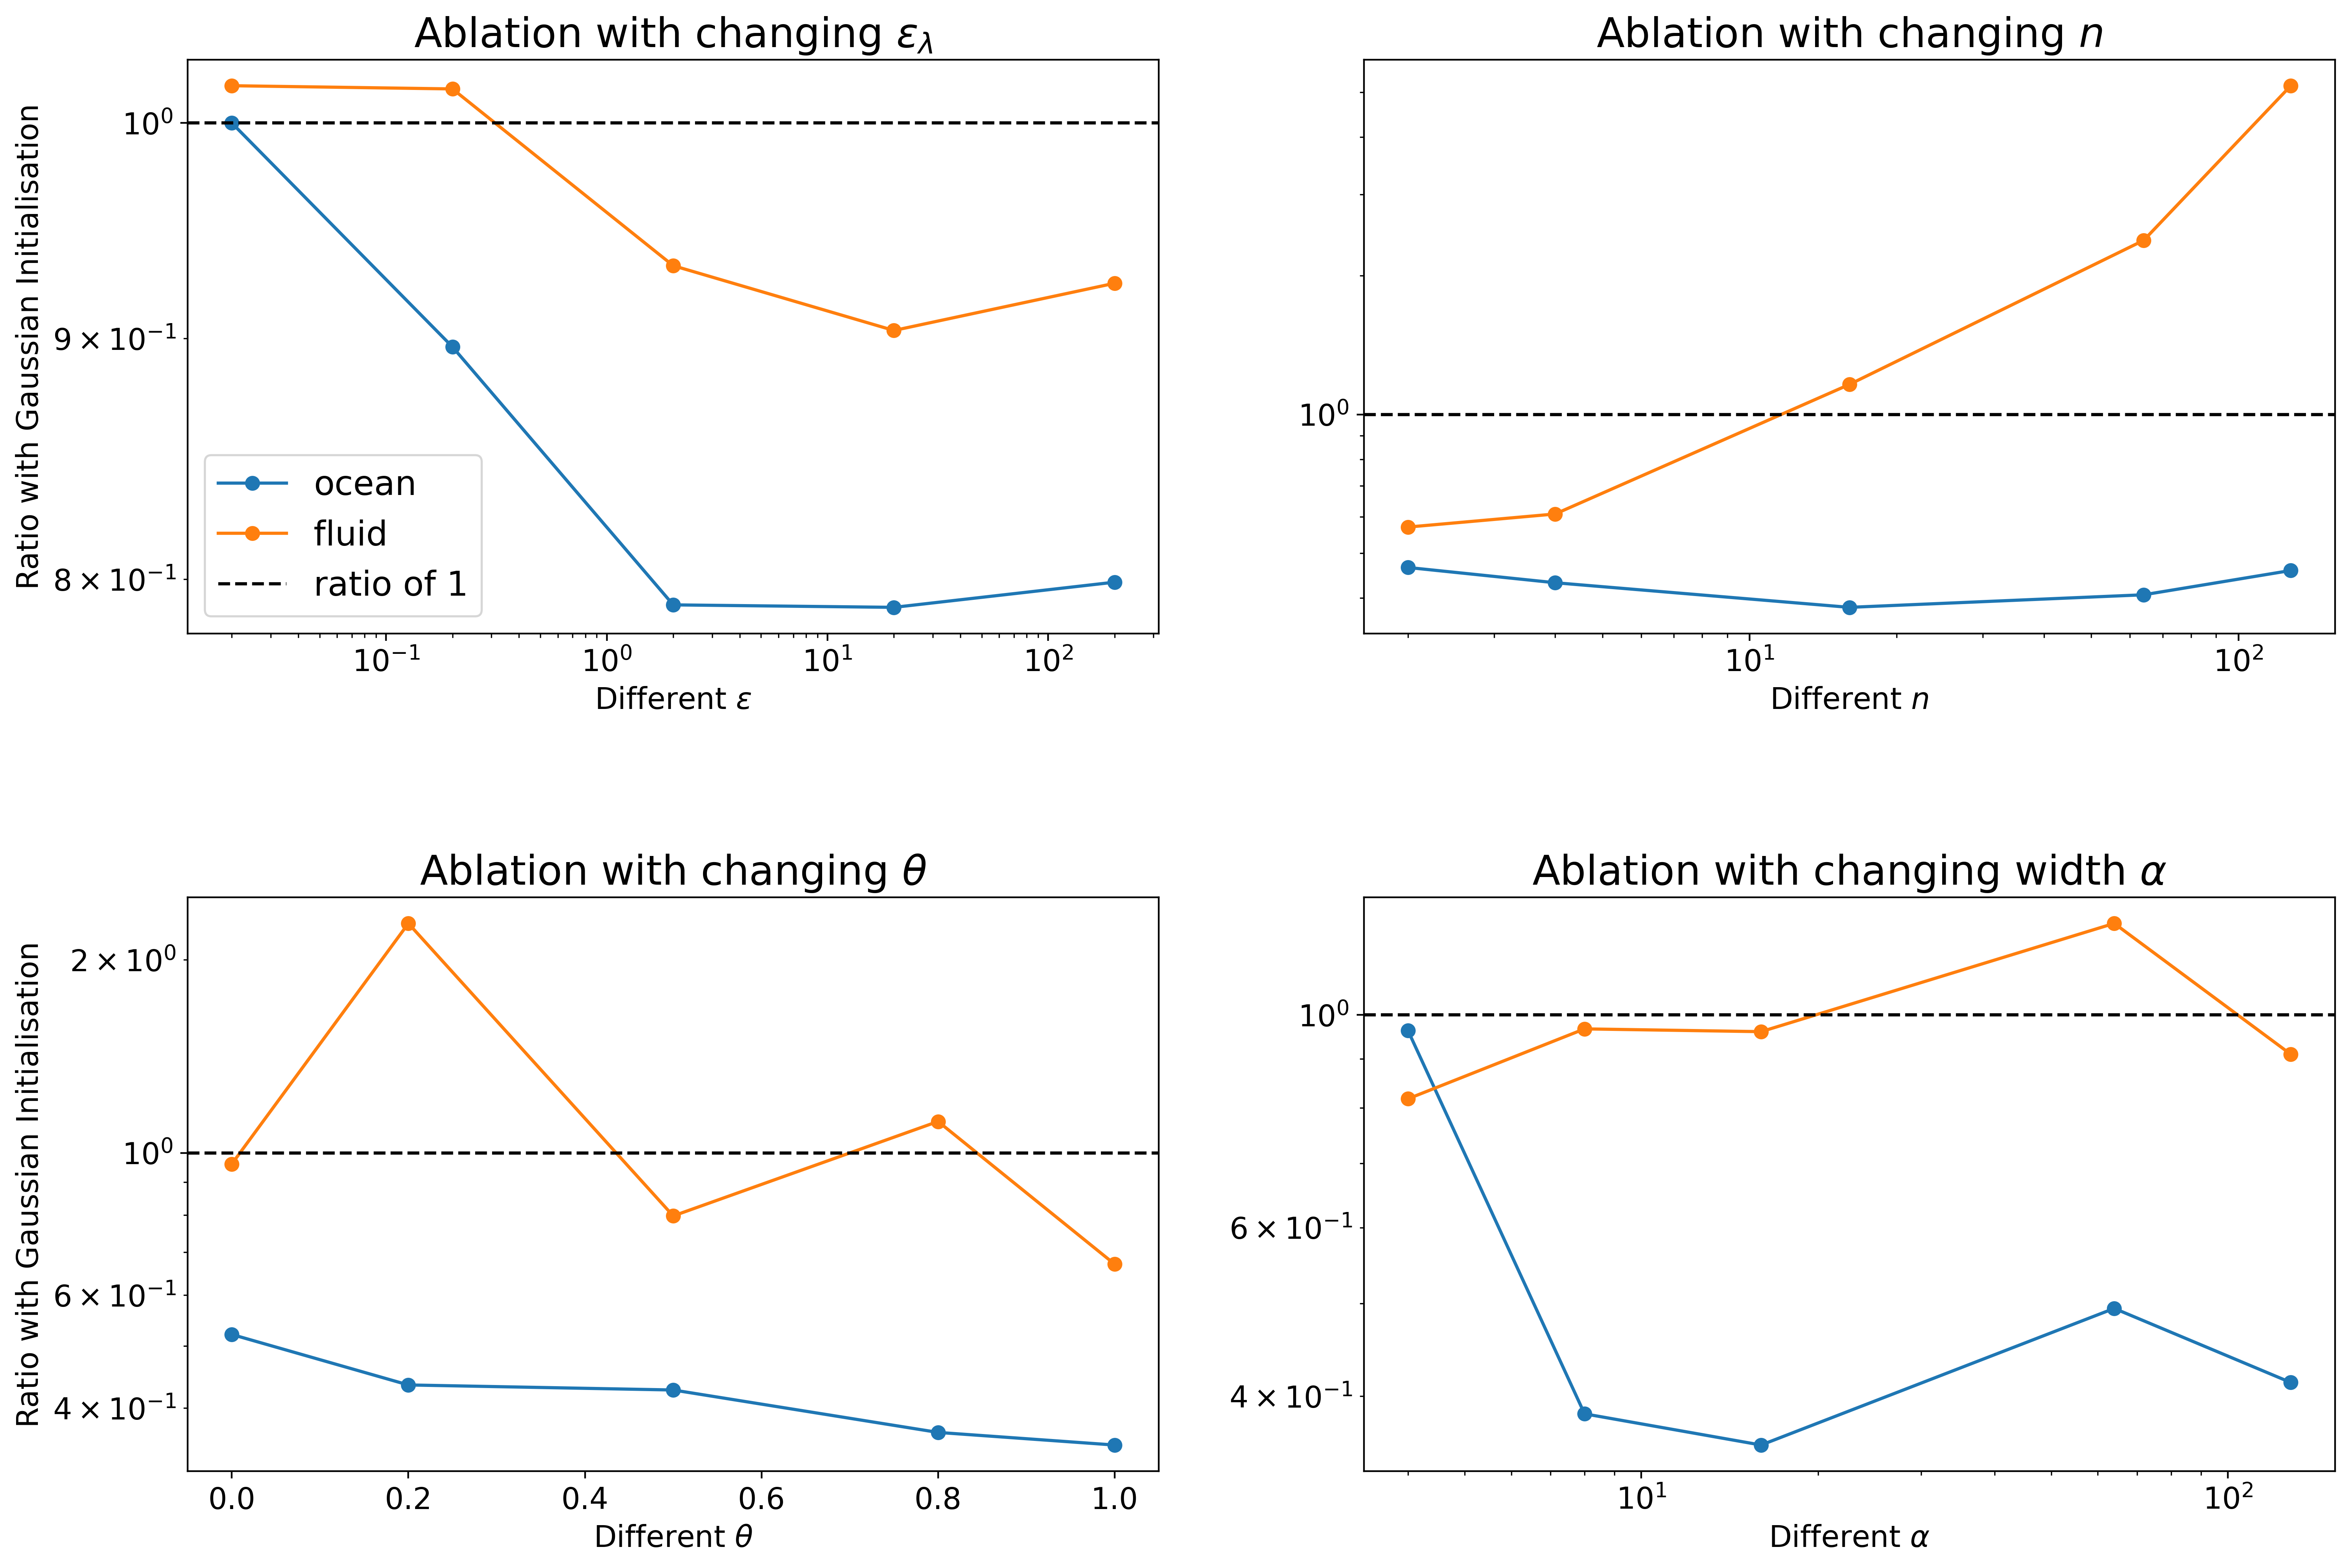

In [11]:
eps_results = {'vlarge-200':{},'large-20':{}, 'medium-2':{}, 'small-0.2': {}, 'vsmall-0.02': {}}
eps_results_fluid = {'vlarge-200':{},'large-20':{}, 'medium-2':{}, 'small-0.2': {}, 'vsmall-0.02': {}}
ko_results = {'KOLL-128':{},'KOL-64':{}, 'KOM-16':{}, 'KOS-4': {}, 'KOSS-2': {}}
ko_results_fluid = {'KOLL-128':{},'KOL-64':{}, 'KOM-16':{}, 'KOS-4':{}, 'KOSS-2':{}}

with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanLossVeryLarge5.json", 'r') as f:
     eps_results['vlarge-200'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanLossLarge5.json", 'r') as f:
     eps_results['large-20'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanLossMedium5.json", 'r') as f:
     eps_results['medium-2'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanLossSmall5.json", 'r') as f:
     eps_results['small-0.2'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanLossVerySmall5.json", 'r') as f:
     eps_results['vsmall-0.02'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLossVeryLarge10.json", 'r') as f:
     eps_results_fluid['vlarge-200'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLossLarge10.json", 'r') as f:
     eps_results_fluid['large-20'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLossMedium10.json", 'r') as f:
     eps_results_fluid['medium-2'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLossSmall10.json", 'r') as f:
     eps_results_fluid['small-0.2'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLossVerySmall10.json", 'r') as f:
     eps_results_fluid['vsmall-0.02'] = json.load(f)        

with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanKOLL5.json", 'r') as f:
     ko_results['KOLL-128'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanKOL5.json", 'r') as f:
     ko_results['KOL-64'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanKOM5.json", 'r') as f:
     ko_results['KOM-16'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanKOS5.json", 'r') as f:
     ko_results['KOS-4'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanKOSS5.json", 'r') as f:
     ko_results['KOSS-2'] = json.load(f)
        
with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidKOLL10.json", 'r') as f:
     ko_results_fluid['KOLL-128'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidKOL10.json", 'r') as f:
     ko_results_fluid['KOL-64'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidKOM10.json", 'r') as f:
     ko_results_fluid['KOM-16'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidKOS10.json", 'r') as f:
     ko_results_fluid['KOS-4'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidKOSS10.json", 'r') as f:
     ko_results_fluid['KOSS-2'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLossKOLL5.json", 'r') as f:
     ko_results_fluid['KOLL-128'].update(json.load(f))

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLossKOL5.json", 'r') as f:
     ko_results_fluid['KOL-64'].update(json.load(f))

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLossKOM5.json", 'r') as f:
     ko_results_fluid['KOM-16'].update(json.load(f))

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLossKOS5.json", 'r') as f:
     ko_results_fluid['KOS-4'].update(json.load(f))

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLossKOSS5.json", 'r') as f:
     ko_results_fluid['KOSS-2'].update(json.load(f))
        
with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanChangingAlpha.json", 'r') as f:
     changingAlpha = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidChangingAlpha.json", 'r') as f:
     changingFluidAlpha = json.load(f)

widthResultsOcean = {'128':{},'64':{}, '16':{}, '8':{}, '4':{}}
widthResultsFluid = {'128':{},'64':{}, '16':{}, '8':{}, '4':{}}

with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanVeryWide5.json", 'r') as f:
     widthResultsOcean['128'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanWide5.json", 'r') as f:
     widthResultsOcean['64'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/ocean5.json", 'r') as f:
     widthResultsOcean['16'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanNarrow5.json", 'r') as f:
     widthResultsOcean['8'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/oceanVeryNarrow5.json", 'r') as f:
     widthResultsOcean['4'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLossVeryWide5.json", 'r') as f:
     widthResultsFluid['128'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLossWide5.json", 'r') as f:
     widthResultsFluid['64'] = json.load(f)

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLoss5.json", 'r') as f:
     widthResultsFluid['16'] = json.load(f)  

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLossNarrow5.json", 'r') as f:
     widthResultsFluid['8'] = json.load(f)  

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluidLossVeryNarrow5.json", 'r') as f:
     widthResultsFluid['4'] = json.load(f)  
        
fig, axs = plt.subplots(2,2,figsize=(15,10), dpi=400)
plt.tight_layout(w_pad=4, h_pad=7)
plt.rcParams.update({'font.size': 16})

for ax in axs:
    ax[0].tick_params(axis='both', which='major', labelsize=14)
    ax[0].tick_params(axis='both', which='minor', labelsize=14)
    ax[1].tick_params(axis='both', which='major', labelsize=14)
    ax[1].tick_params(axis='both', which='minor', labelsize=14)
#plt.rcParams['text.usetex'] = True
eps_scores = []
eps_scores_fluid = []

for name,result in eps_results.items():
    splt_names = name.split('-')
    # print(result)
    # print(result['unit_circle_mse']['gaussianElement']['1e0'])
    # print(result['unit_circle_mse']['gaussianElement']['1e0']['testAccuracy'])
    test_score = np.cumsum(np.array(result['unit_circle_mse']['gaussianElement']['1e0']['testAccuracy']))[-1]
    eps_scores.append(test_score/3.664151949187119)

for name,result in eps_results_fluid.items():
    splt_names = name.split('-')
    # print(result)
    # print(result['unit_circle_mse']['gaussianElement']['1e0'])
    # print(result['unit_circle_mse']['gaussianElement']['1e0']['testAccuracy'])
    test_score = np.cumsum(np.array(result['unit_circle_mse']['gaussianElement']['1e0']['testAccuracy']))[-1]
    eps_scores_fluid.append(test_score/0.8822943232953548)
    
# print(max(eps_scores_fluid))
# print(max(eps_scores))
# print(eps_scores)
eps_scores.reverse()
values = [0.02,0.2,2,20,200]
axs[0][0].plot(values, eps_scores, '-o', label='ocean')
axs[0][0].plot(values, eps_scores_fluid, '-o', label='fluid')
axs[0][0].axhline(y=1, color='black', linestyle='--', label='ratio of 1')
axs[0][0].set_title(r'Ablation with changing $\epsilon_{\lambda}$')
axs[0][0].set_xlabel(r'Different $\epsilon$')
axs[0][0].set_xscale('log')
axs[0][0].set_yscale('log')
axs[0][0].set_ylabel('Ratio with Gaussian Initialisation')
axs[0][0].legend()
    
ko_scores = []
for name,result in ko_results.items():
        
    splt_names = name.split('-')
    # print(result)
    # print(result['unit_circle_mse']['gaussianElement']['1e0'])
    # print(result['unit_circle_mse']['gaussianElement']['1e0']['testAccuracy'])
    gInit = np.cumsum(np.array(result['unit_circle_mse']['gaussianElement']['1e0']['testAccuracy']))[-1]
    print(f"ocean g {gInit}")
    slInit = np.cumsum(np.array(result['unit_circle_mse']['spikeAndSlab']['1e-1']['testAccuracy']))[-1]
    ko_scores.append(slInit/gInit)
    
ko_scores_fluid = []
for name,result in ko_results_fluid.items():
    # print(f"g {result['none']['gaussianElement']['1e0']['testAccuracy']}")
    # print(f"ng {result['none']['uniformEigen']['1e0']['testAccuracy']}")
    splt_names = name.split('-')
    # print(result)
    # print(result['unit_circle_mse']['gaussianElement']['1e0'])
    # print(result['unit_circle_mse']['gaussianElement']['1e0']['testAccuracy'])
    gInit = np.cumsum(np.array(result['none']['gaussianElement']['1e0']['testAccuracy']))[-1]
    # print(f"g = {gInit}")
    slInit = np.cumsum(np.array(result['unit_circle_mse-none']['gaussianElement']['1e0']['testAccuracy']))[-1]
    # print(f"s = {slInit}")
    ko_scores_fluid.append(slInit/gInit)

    
values = [2,4,16,64,128]
values.reverse()
axs[0][1].plot(values, ko_scores, '-o', label='ocean')
axs[0][1].plot(values, ko_scores_fluid, '-o', label='fluid')
axs[0][1].axhline(y=1, color='black', linestyle='--', label='ratio of 1')
axs[0][1].set_title(r'Ablation with changing $n$')
axs[0][1].set_xlabel(r'Different $n$')
axs[0][1].set_xscale('log')
axs[0][1].set_yscale('log')
# axs[0][1].set_ylabel('Ratio with Gaussian initialisation')

sl_scores = []
for init_name, init in changingAlpha['none'].items():
    splt_names = name.split('-')
    # print(result)
    # print(result['unit_circle_mse']['gaussianElement']['1e0'])
    # print(result['unit_circle_mse']['gaussianElement']['1e0']['testAccuracy'])
    slInit = np.cumsum(np.array(init['1e0']['testAccuracy']))[-1]
    sl_scores.append(slInit/3.07188000716269)

sl_scores_fluid = []
for init_name, init in changingFluidAlpha['none'].items():
    splt_names = name.split('-')
    # print(result)
    # print(result['unit_circle_mse']['gaussianElement']['1e0'])
    # print(result['unit_circle_mse']['gaussianElement']['1e0']['testAccuracy'])
    slInit = np.cumsum(np.array(init['1e0']['testAccuracy']))[-1]
    sl_scores_fluid.append(slInit/1.3103152252733707)

# print(max(sl_scores_fluid))
values = [0,0.2,0.5,0.8,1]
axs[1][0].plot(values, sl_scores, '-o', label='ocean')
axs[1][0].plot(values, sl_scores_fluid, '-o', label='fluid')
axs[1][0].axhline(y=1, color='black', linestyle='--', label='ratio of 1')
axs[1][0].set_title(r'Ablation with changing $\theta$')
axs[1][0].set_xlabel(r'Different $\theta$')
axs[1][0].set_ylabel('Ratio with Gaussian Initialisation')
axs[1][0].set_yscale('log')
    
width_scores_ocean = []
for width, result in widthResultsOcean.items():
    # print(result)
    splt_names = name.split('-')
    gInit = np.cumsum(np.array(result['none']['gaussianElement']['1e0']['testAccuracy']))[-1]
    # print(f"g = {gInit}")
    slInit = np.cumsum(np.array(result['none']['spikeAndSlab']['1e-1']['testAccuracy']))[-1]
    # print(f"s = {slInit}")
    width_scores_ocean.append(slInit/gInit)

width_scores_fluid = []
for width, result in widthResultsFluid.items():
    # print(result)
    splt_names = name.split('-')
    gInit = np.cumsum(np.array(result['none']['gaussianElement']['1e0']['testAccuracy']))[-1]
    print(f"g = {gInit}")
    slInit = np.cumsum(np.array(list(list(result['unit_circle_mse-none'].values())[0].values())[0]['testAccuracy']))[-1]
    print(f"s = {slInit}")
    width_scores_fluid.append(slInit/gInit)

print(max(width_scores_ocean))
print(max(width_scores_fluid))
values = [128,64,16,8,4]
axs[1][1].plot(values, width_scores_ocean, '-o', label='ocean')
axs[1][1].plot(values, width_scores_fluid, '-o', label='fluid')
axs[1][1].axhline(y=1, color='black', linestyle='--', label='ratio of 1')
axs[1][1].set_title(r'Ablation with changing width $\alpha$')
axs[1][1].set_xlabel(r'Different $\alpha$')
# axs[1][1].set_ylabel('Ratio with Gaussian Initialisation')
axs[1][1].set_yscale('log')
axs[1][1].set_xscale('log')

# print(results['none']['spikeAndSlab']['1e-1'].keys())
# r = np.cumsum(results['none']['newInit']['1e0']['testAccuracy'])
# x,y = smooth(r,[i for i in range(0,len(r))])
# print(x)
# plt.plot(y,x, color='blue')

# r = np.cumsum(results2['none']['unitPerturb']['1e0']['testAccuracy'])
# x,y = smooth(r,[i for i in range(0,len(r))])
# plt.plot(y,x)
plt.savefig('ablations.pdf', transparent=True, bbox_inches='tight',pad_inches=0, dpi=400)
plt.show()

# import numpy as np
i = -1
j = -1
list1 = [[],[],[]]
list2 = [[],[],[]]
for index, row in df11.iterrows():
    if index % 150 == 0:
        j += 1
        i = -1
    
    if index % 50 == 0:
        i += 1
    
    if j == 2:
        list1[i].append(row[3:].values)
    
    if j == 3:
        list2[i].append(row[3:].values)
    
def get_avg_array(lst):        
    avg_array = np.zeros((16,49))

    for i in range(0,len(lst[0])-1):
        for k in range(0,16):

            avg_array[k][i] = abs(complex(lst[0][i][k]))
    
    return avg_array
        # avg.append(((np.array(l[0][i])) + np.array(l[1][i]) + np.array(l[2][i]))/3)

In [ ]:
import seaborn
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=0, vmax=1)

fig, axs = plt.subplots(2,1, figsize=(10,6), dpi=600)
seaborn.heatmap(get_avg_array(list1), ax=axs[0], robust=True)
seaborn.heatmap(get_avg_array(list2), ax=axs[1], robust=True)
axs[0].set_title('Uniform Eigenvalue Distribution')
axs[1].set_title('Gaussian Element Distribution')

for ax in axs:
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Index of Eigenvalue')

plt.subplots_adjust(hspace = 0.4 )
plt.savefig('Eigenvalue Plot.png')

<AxesSubplot:>

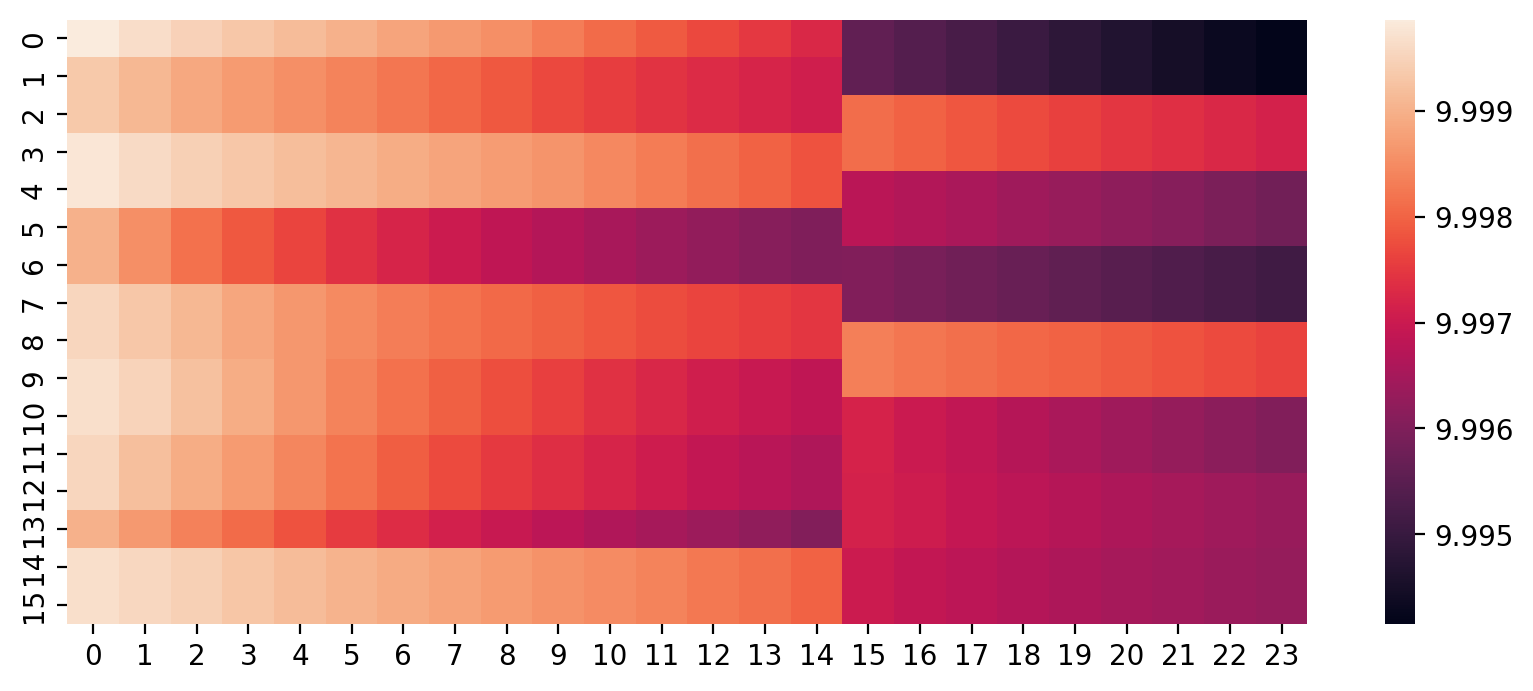

In [139]:
fig = plt.figure(figsize=(10,4), dpi=200)
seaborn.heatmap(get_avg_array(list2))